<h1 id="display">The display package</h1>
<p>
The package `github.com/gopherdata/gophernotes` is automatically imported with the name `display`.
</p><p>
It provides several functions that convert `string` or `[]byte` containing images, HTML, Markdown, LaTeX etc. to `display.Data`, which is shown graphically if returned at prompt. Example:
<p/>

In [1]:
display.HTML(`<h1 style="color:green;">Hello, World</h1>`)

<h1 style="color:green;">Hello, World</h1>

<h1>Display function</h1>
<p>
Sometimes, returning `display.Data` at prompt is not handy - for example from deep inside functions or blocks, or because you want to display multiple data at once.
</p><p>
In such cases, you can call the function `Display(display.Data) error` to display the data immediately:
</p>

In [2]:
{
    Display(display.Markdown("* hello from markdown"))
    Display(display.Math(`e^{i\Pi}+1=0`))
}

* hello from markdown

e^{i\Pi}+1=0

<h1 id="images">Images</h1>
<p>
The functions to display JPEG, PNG or SVG images and `image.Image` are:
</p>
```
display.JPEG([]byte) error
display.PNG([]byte) error
display.SVG(string) error
display.Image(image.Image) error
```
Examples:

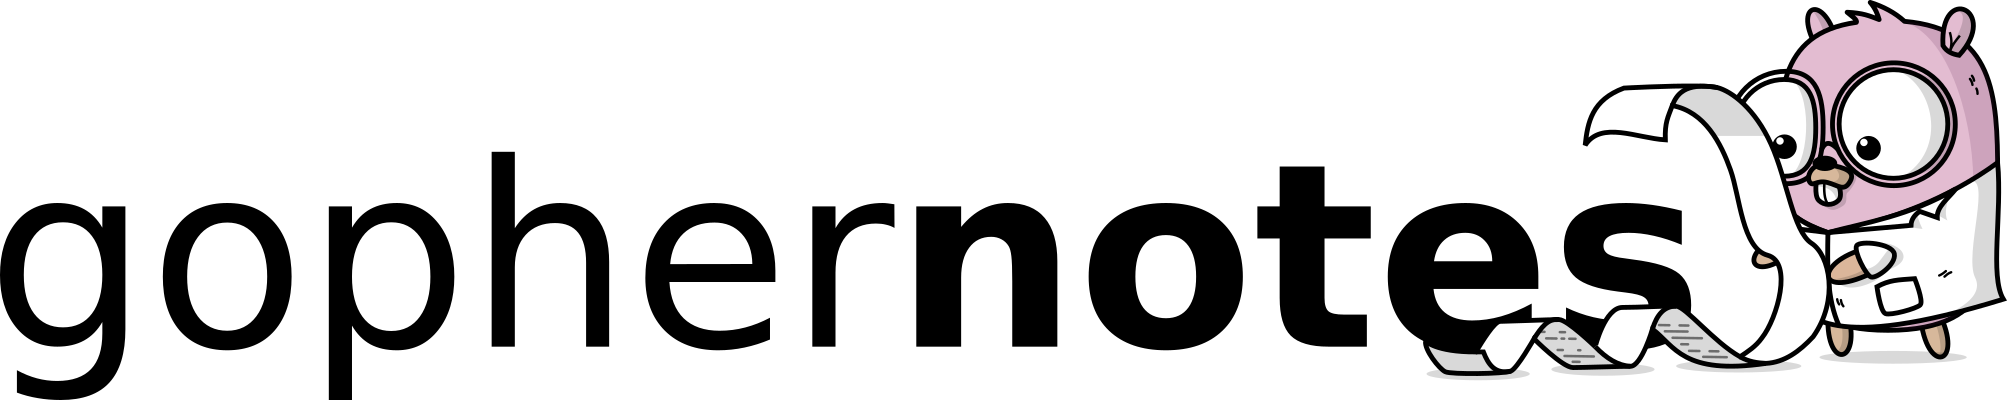

In [3]:
// download and display a PNG
import (
    "net/http"
    "io/ioutil"
)
resp, err := http.Get("https://github.com/gopherdata/gophernotes/raw/master/files/gophernotes-logo.png")
bytes, err := ioutil.ReadAll(resp.Body)
resp.Body.Close()
display.PNG(bytes)

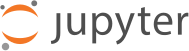

In [4]:
// download and display an SVG
resp, err := http.Get("http://jupyter.org/assets/nav_logo.svg")
bytes, err := ioutil.ReadAll(resp.Body)
resp.Body.Close()
display.SVG(string(bytes))

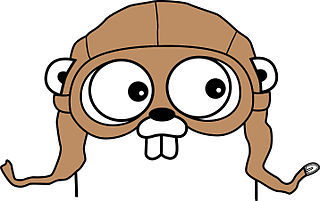

In [5]:
// download and display a JPEG
resp, err := http.Get("https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Gophercolor.jpg/320px-Gophercolor.jpg")
bytes, err := ioutil.ReadAll(resp.Body)
resp.Body.Close()
display.JPEG(bytes)

Or, if you prefer to use `image.Image`:

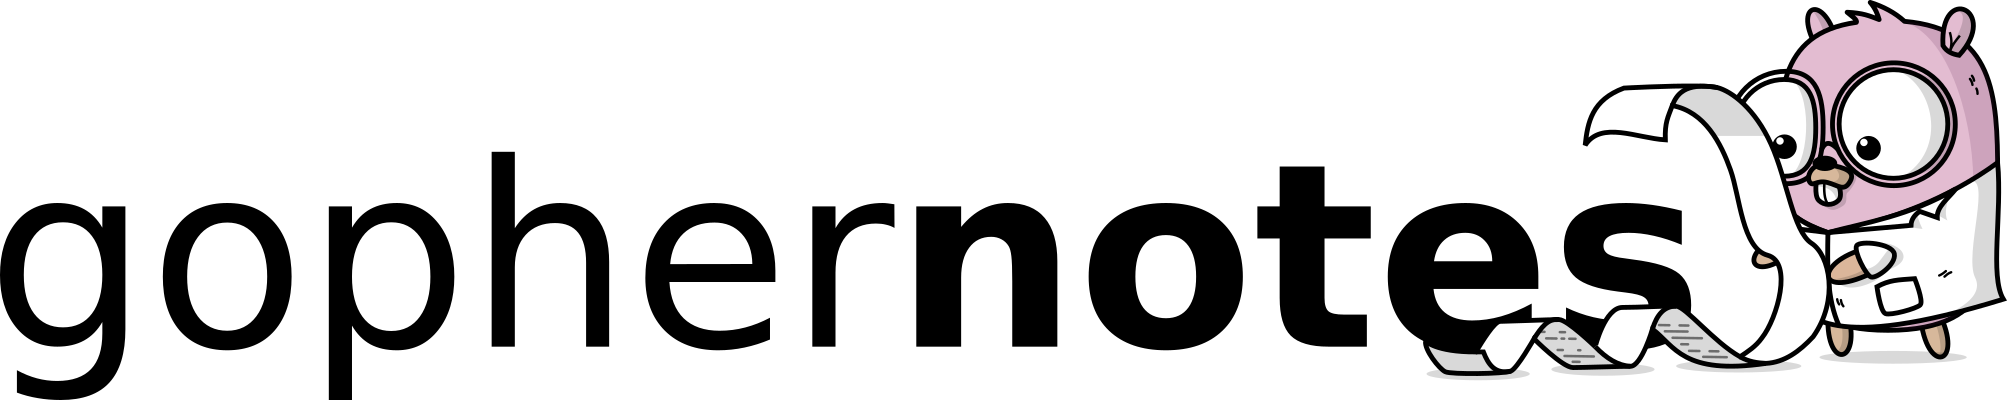

In [6]:
import "image"
resp, err := http.Get("https://github.com/gopherdata/gophernotes/raw/master/files/gophernotes-logo.png")
img, ext, err := image.Decode(resp.Body)
resp.Body.Close()
display.Image(img)

<h1 id="reference">Reference</h1>
<p>The full list of available constants, types, and functions in package `display` is:<p>

In [7]:
const (
	MIMETypeHTML       = "text/html"
	MIMETypeJavaScript = "application/javascript"
	MIMETypeJPEG       = "image/jpeg"
	MIMETypeJSON       = "application/json"
	MIMETypeLatex      = "text/latex"
	MIMETypeMarkdown   = "text/markdown"
	MIMETypePNG        = "image/png"
	MIMETypePDF        = "application/pdf"
	MIMETypeSVG        = "image/svg+xml"
)

// bundledMIMEData holds data that can be presented in multiple formats. The keys are MIME types
// and the values are the data formatted with respect to its MIME type. All bundles should contain
// at least a "text/plain" representation with a string value.
type BundledMIMEData map[string]interface{}

type Data struct {
	Data      BundledMIMEData
	Metadata  BundledMIMEData
	Transient BundledMIMEData
}

func HTML(html         string) Data
func JSON(json         map[string]interface{}) Data
func JavaScript(javascript string) Data
func JPEG(jpeg         []byte) Data
func Latex(latex       string) Data
func Markdown(markdown string) Data
func Math(latex        string) Data // LaTeX formula, without starting and ending '$$' 
func PDF(pdf           []byte) Data
func PNG(png           []byte) Data
func SVG(svg           string) Data

func MakeData(mimeType string, data interface{}) Data
func MakeData3(mimeType string, plaintext string, data interface{}) Data
func Bytes(mimeType string, bytes []byte) Data
func String(mimeType string, s string) Data
func MIME(data, metadata map[string]interface{}) Data